In [2]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline
from scipy.integrate import odeint

1.4691358024691357


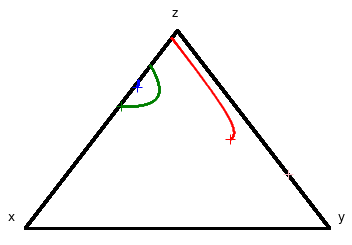

In [7]:
# define a projection from the 3D simplex on a triangle
proj = np.array(
[[-1 * np.cos(30. / 360. * 2. * np.pi),np.cos(30. / 360. * 2. * np.pi),0.],
[-1 * np.sin(30. / 360. * 2. * np.pi),-1 * np.sin(30. / 360. * 2. * np.pi),1.]])
# project the boundary on the simplex onto the boundary of the triangle
ts = np.linspace(0, 1, 10000)
PBd1 = proj@np.array([ts,(1-ts),0*ts])
PBd2 = proj@np.array([0*ts,ts,(1-ts)])
PBd3 = proj@np.array([ts,0*ts,(1-ts)])

# choose game
# evolutionary donation game with w = 0.7, (eps,k)=(0.1,0.5) and (b,c)=(2,1)
R, T, S, P = 3, 5, 0, 1
w = 0.7 # probability of game continuous
b, c = 2, 1 # pay-off of each situation
eps, k = 0.1, 0.5
beta = (1/c)*((b-c)-eps*b)
delta = w*eps
kappa = 1-w+w*k*eps
theta = w*(1-(k+1)*eps)
sigma = (b*theta-c)/(c-c*theta)
print((1/1+sigma))
z0 = (T-R)/((T-P)*w)
zhat = ((P-S)*(w-1))/(S-P-R+T+(2*P-S-T)*w)
y1 = 0.01
z1 = ((S-P-R+T)*y1-(T-R+w*S-w*P))/((2*P-S-T)*w)

A = np.array([[ R, S , R], [ T, P , (1-w)*T+w*P], [R , (1-w)*S+w*P ,R]]) # row, 2nd row, 3rd row
x01 = np.array([1-y1-z1, y1, z1]) # when TFT converges to 0, AllD wins
x02 = np.array([0.1, 0.45, 0.45]) # the strategies co-exist
x03 = np.array([0.99-z0, 0.01, z0]) # the strategies co-exist
x04 = np.array([0, 1-zhat, zhat]) # middle point of 01 and 03
# define replicator equation
def replicator(x,t):
    return x * (A@x - np.transpose(x) @ (A@x))

# compute orbits
ts = np.linspace(0,200,10000)
xt1 = odeint(replicator, x01, ts)
xt2 = odeint(replicator, x02, ts)
xt3 = odeint(replicator, x03, ts)
xt4 = odeint(replicator, x04, ts)

# project the orbits on the triangle
orbittriangle1=proj@xt1.T
orbittriangle2=proj@xt2.T
orbittriangle3=proj@xt3.T
orbittriangle4=proj@xt4.T
ic1=proj@x01
ic2=proj@x02
ic3=proj@x03
ic4=proj@x04
# no box
plt.box(False)
plt.axis(False)
# plot the orbits, the initial values, the corner points, and the boundary points
plt.plot(PBd1[0], PBd1[1], ".",color='black',markersize=3)
plt.plot(PBd2[0], PBd2[1], ".",color='black',markersize=3)
plt.plot(PBd3[0], PBd3[1], ".",color='black',markersize=3)
plt.plot(orbittriangle1[0],orbittriangle1[1],".",markersize=1,color='green')
plt.plot(orbittriangle2[0],orbittriangle2[1],".",markersize=1,color='red')
plt.plot(orbittriangle3[0],orbittriangle3[1],".",markersize=1,color='blue')
plt.plot(orbittriangle4[0],orbittriangle4[1],".",markersize=1,color='pink')
plt.plot(ic1[0],ic1[1],"+",markersize=10,color='green')
plt.plot(ic2[0],ic2[1],"+",markersize=10,color='red')
plt.plot(ic3[0],ic3[1],"+",markersize=10,color='blue')
plt.plot(ic4[0],ic4[1],"+",markersize=10,color='pink')
plt.text(-0.8660254-0.1, -0.5 +0.05 , "x",fontsize=12)
plt.text(+0.8660254+0.05, -0.5 +0.05 , "y",fontsize=12)
plt.text(0-0.03, 1 +0.1 , "z",fontsize=12)

plt.show()

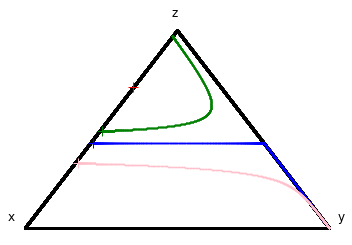

In [28]:
# define a projection from the 3D simplex on a triangle
proj = np.array(
[[-1 * np.cos(30. / 360. * 2. * np.pi),np.cos(30. / 360. * 2. * np.pi),0.],
[-1 * np.sin(30. / 360. * 2. * np.pi),-1 * np.sin(30. / 360. * 2. * np.pi),1.]])
# project the boundary on the simplex onto the boundary of the triangle
ts = np.linspace(0, 1, 10000)
PBd1 = proj@np.array([ts,(1-ts),0*ts])
PBd2 = proj@np.array([0*ts,ts,(1-ts)])
PBd3 = proj@np.array([ts,0*ts,(1-ts)])

# choose game
# evolutionary donation game with w = 0.7, (eps,k)=(0.1,0.5) and (b,c)=(2,1)
R, T, S, P = 3, 5, 0, 1
w = 0.7 # probability of game continuous
b, c = 2, 1 # pay-off of each situation
eps, k = 0.1, 0
beta = (1/c)*(((b-c)/(1+k))-eps*b)

A = np.array([[ b-c, -c , b-c], [ b, 0 ,(1-w)*b], [ b-c, (1-w)*(-c) ,b-c]]) # row, 2nd row, 3rd row
x01 = np.array([0.5, 0.01, 0.49]) # when TFT converges to 0, AllD wins
x02 = np.array([1-(c/(w*b)), 0, c/(w*b)]) # the strategies co-exist
x03 = np.array([0.99-((c*(1-w))/((b-c)*w)), 0.01, (c*(1-w))/((b-c)*w)]) # the strategies co-exist
x04 = np.array([0.99-((c*(1-w))/((b-c)*w))+0.1, 0.01,  (c*(1-w))/((b-c)*w)-0.1]) # middle point of 01 and 03
# define replicator equation
def replicator(x,t):
    return x * (A@x - np.transpose(x) @ (A@x))
# compute orbits
ts = np.linspace(0,200,10000)
xt1 = odeint(replicator, x01, ts)
xt2 = odeint(replicator, x02, ts)
xt3 = odeint(replicator, x03, ts)
xt4 = odeint(replicator, x04, ts)

# project the orbits on the triangle
orbittriangle1=proj@xt1.T
orbittriangle2=proj@xt2.T
orbittriangle3=proj@xt3.T
orbittriangle4=proj@xt4.T
ic1=proj@x01
ic2=proj@x02
ic3=proj@x03
ic4=proj@x04
# no box
plt.box(False)
plt.axis(False)
# plot the orbits, the initial values, the corner points, and the boundary points
plt.plot(PBd1[0], PBd1[1], ".",color='black',markersize=3)
plt.plot(PBd2[0], PBd2[1], ".",color='black',markersize=3)
plt.plot(PBd3[0], PBd3[1], ".",color='black',markersize=3)
plt.plot(orbittriangle1[0],orbittriangle1[1],".",markersize=1,color='green')
plt.plot(orbittriangle2[0],orbittriangle2[1],".",markersize=1,color='red')
plt.plot(orbittriangle3[0],orbittriangle3[1],".",markersize=1,color='blue')
plt.plot(orbittriangle4[0],orbittriangle4[1],".",markersize=1,color='pink')
plt.plot(ic1[0],ic1[1],"+",markersize=10,color='green')
plt.plot(ic2[0],ic2[1],"+",markersize=10,color='red')
plt.plot(ic3[0],ic3[1],"+",markersize=10,color='blue')
plt.plot(ic4[0],ic4[1],"+",markersize=10,color='pink')
plt.text(-0.8660254-0.1, -0.5 +0.05 , "x",fontsize=12)
plt.text(+0.8660254+0.05, -0.5 +0.05 , "y",fontsize=12)
plt.text(0-0.03, 1 +0.1 , "z",fontsize=12)

plt.show()